In [48]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re

from nltk.stem import RSLPStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/vinicius/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
STOPWORDS_PORTUGUESE = stopwords.words('portuguese') + ['aê', 'ei', 'ô', 'au', 'ai', 'oi', 'ó', ]

In [3]:
SONGS_DIR = './songs/'
START_YEAR = 1990
END_YEAR = 2023
FILE_PATHS = [os.path.join(SONGS_DIR, str(year)+'.csv') for year in np.arange(START_YEAR, END_YEAR+1)]
COLUMN_NAMES = ['title', 'artist', 'lyrics']

df_dict = {k:[] for k in COLUMN_NAMES}
df = pd.DataFrame()

for i, file_path in enumerate(FILE_PATHS):
    file_df = pd.read_csv(file_path)
    file_df['year'] = pd.Series([START_YEAR+i for _ in range(file_df.shape[0])])
    df = pd.concat([df, file_df])

In [4]:
def count_songs_per_year(df):
    return df['year'].value_counts().index, df['year'].value_counts().values

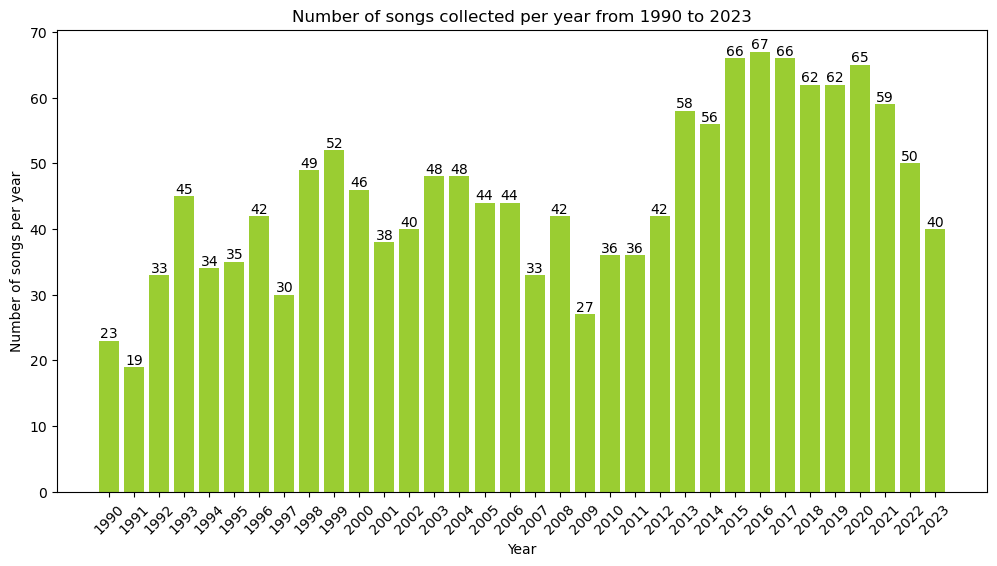

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
years, counts = count_songs_per_year(df)
ax.set_title('Number of songs collected per year from 1990 to 2023')
ax.set_xticks(years,labels=years,rotation=45)
bars = ax.bar(height=counts,x=years,color='yellowgreen')
ax.bar_label(bars, labels=counts)
ax.set_xlabel('Year')
ax.set_ylabel('Number of songs per year')
plt.show()

In [44]:
STEMMER = RSLPStemmer()
TOKERNIZER = RegexpTokenizer(re.compile(r'\w+'))

def clean_lyrics(lyrics: str) -> str:
    lyrics = re.sub('\n+', ' ', lyrics)
    lyrics = lyrics.lower()
    return [STEMMER.stem(word) for word in TOKERNIZER.tokenize(lyrics) if word not in STOPWORDS_PORTUGUESE and not re.match(r'\d+', word)]

df['clean_lyrics'] = df['lyrics'].apply(clean_lyrics)